Daily Challenge: Complete Exploratory Data Analysis.

What You Will Learn
Skills in cleaning, integrating, and exploring data using Python.
Proficiency in using Pandas for complex data manipulation and statistical analysis.
Differentiating between unstructured and structured data and their implications in data analysis.


Instructions
Download and import the Data Science Job Salary dataset here.
Identify and differentiate between quantitative and qualitative data within the dataset.
Preprocess the data by handling missing values and removing duplicates if needed.
Perform a group-wise analysis of the experience_level column, calculating the mean and median salaries for each group using Pandas’ .groupby.
Utilize Pandas’ integration with Matplotlib to create a bar chart visualizing the average salaries for each experience level. Ensure the chart includes appropriate labels, a title, and a color scheme that enhances readability.


Duration & Difficulty
Duration (approx)	Difficulty
30 minutes	⭐⭐
Submit Your Daily Challenge
Upload your Python scripts, along with a detailed report of your preprocessing steps, findings from your statistical analysis, and insights on GitHub. Include a reflection on how the lack of visualization impacted your analysis and any challenges you encountered.

In [5]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

df = pd.read_csv('/Users/teitelbaumsair/Desktop/DI_Bootcamp/W4/D5/DAILY CHALLENGE/ds_salaries.csv')

In [16]:
df.head(5)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [ ]:
# Identify and differentiate between quantitative and qualitative data within the dataset.
df.dtypes

Unnamed: 0             int64
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

The dataframe consists of only "Int64" and "Object" types.
- Int64 is Quantitative.
- Object is qualitative. 

In [9]:
# Preprocess the data by handling missing values and removing duplicates if needed.
df.isna().sum()  # Check for missing values

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [14]:
# Preprocess the data by handling missing values and removing duplicates if needed.
df.loc[df.duplicated()] #to see if any columns are duplicate

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size


Running a quick program to check for duplicate and missing values shows that this dataset contains no duplicates and no missing values.

In [ ]:
# Perform a group-wise analysis of the experience_level column, calculating the mean and median salaries for each group using Pandas’ .groupby.
df2 = df[[
    # 'Unnamed: 0', 'work_year', 
    'experience_level', 
    'employment_type',
    'job_title', 
    # 'salary', 'salary_currency', 
    'salary_in_usd',
    'employee_residence', 
    # 'remote_ratio', 
    'company_location',
    # 'company_size'
    ]].copy()

In [25]:
df2 = df2.rename(columns={'experience_level':'XP_Level',
                   'employment_type':'Employment_Type',
                   'job_title':'Job_Title',
                   'salary_in_usd':'Salary_in_USD',
                   'employee_residence':'Employee_Residence',
                   'company_location':'Company_Location',
                   })

First I want to clean the data and create a copy of the data set to reference for the analysis in fields that are most relevant to determining the key elements of what is correlated to the experience level. 

For example, I want to remove the columns that are not relevant to the analysis, but performing a drop function will alter the original dataset, and I may not want to do that yet. By creating a copy of the dataset as seen above I don't have to drop any values from the opriginal data set and can perform a more accurate analysis of experience level. 

Now I have a clean dataset that allows me to keep only relevant elements in my analysis. The most important note to make is that I've removed salary and salary currency as the data has already been normalized in the 'salary_in_usd' column. So the other salary columns aren't relevant. Then I keep data like location, employee residence, job title, employment level and type in order to make a more concise comparison. Additionally, I have renamed the columns and edited them so the data is clean looking and neat. 

In [26]:
df2['XP_Level'].value_counts()

XP_Level
SE    280
MI    213
EN     88
EX     26
Name: count, dtype: int64

Running a value count for 'experience_level' allows me to see all values in that column as well as how many there are at each level. With this knowledge I can group the levels accurately for further analysis. 

Text(0, 0.5, 'Experience Level')

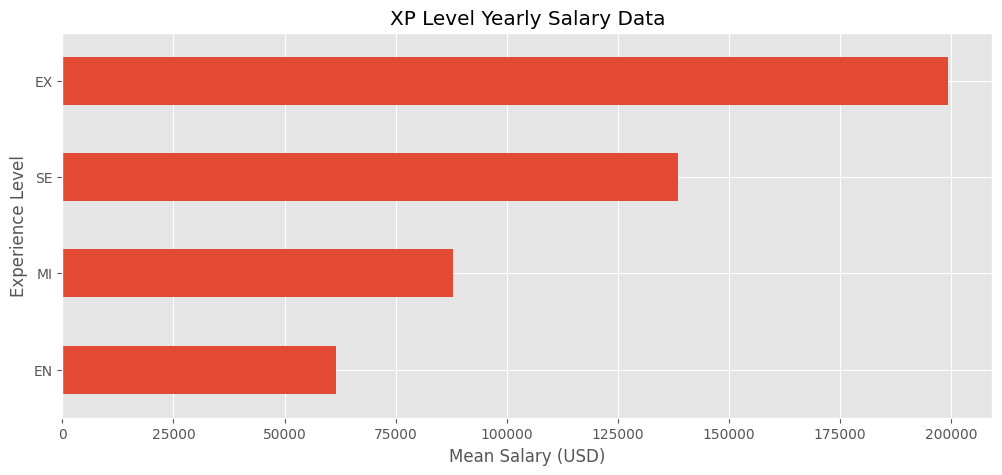

In [ ]:
#Utilize Pandas’ integration with Matplotlib to create a bar chart visualizing the average salaries for each experience level. Ensure the chart includes appropriate labels, a title, and a color scheme that enhances readability.

salary_stats = df2.groupby('XP_Level')['Salary_in_USD'].agg(['mean', 'median'])
salary_stats = salary_stats.sort_values('mean')

# Plot the data
ax = salary_stats['mean'].plot(kind='barh', figsize=(12, 5), title='XP Level Yearly Salary Data')
ax.set_xlabel('Mean Salary (USD)')
ax.set_ylabel('Experience Level')

In [30]:
salary_stats = df2.groupby('XP_Level')['Salary_in_USD'].agg(['mean', 'median'])

# Print median salaries
print("Median Salaries by XP Level:")
print(salary_stats['median'])

Median Salaries by XP Level:
XP_Level
EN     56500.0
EX    171437.5
MI     76940.0
SE    135500.0
Name: median, dtype: float64


Above we have a horizontal bar graph showing the experinece level and mean salary per year. Additionally we have the median salary data for each XP level visible for further clarification. The analyst can look at the bar graph and compar the output of the median to the mean. There are other more complex ways of comparing and visualizing this data, but I do not think we've leanred how to code it yet. 